In [51]:
# nessaary library import 
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns  
from collections import Counter  

#Sklearn library 
from sklearn.model_selection import train_test_split ,StratifiedKFold,cross_val_score 
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder ,LabelEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer 

# from models 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier ,AdaBoostClassifier 
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB 


# Metrics & uitilities 
from sklearn.metrics import classification_report,accuracy_score ,precision_recall_curve ,recall_score ,f1_score,roc_auc_score,confusion_matrix
import joblib 
import warnings 
warnings.filterwarnings("ignore")

# Display the setting  
sns.set_theme(style="whitegrid",palette='muted',font_scale=1.05) 
pd.set_option('display.max_columns',200)

In [5]:
# load the data  
df =pd.read_csv('Bank Customer Churn Prediction.csv') 


In [6]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.shape

(10000, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [9]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [12]:
df.churn.value_counts(normalize=False)

churn
0    7963
1    2037
Name: count, dtype: int64

In [13]:
df.churn.value_counts(normalize=True)

churn
0    0.7963
1    0.2037
Name: proportion, dtype: float64

###  Exploratory Data Analysis (Visualizations) 

In [14]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

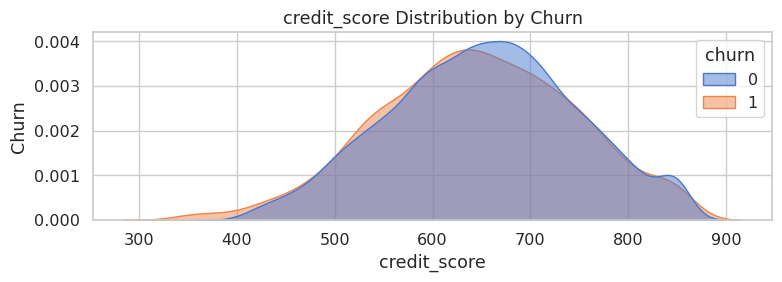

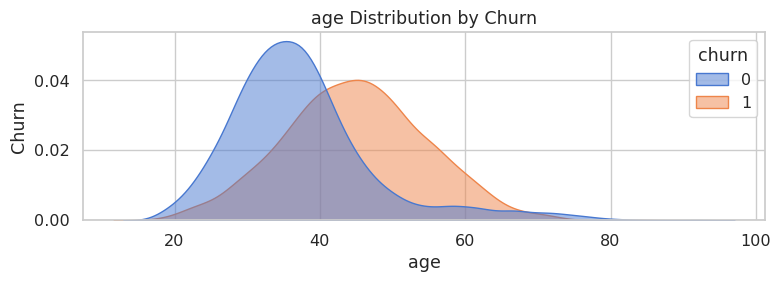

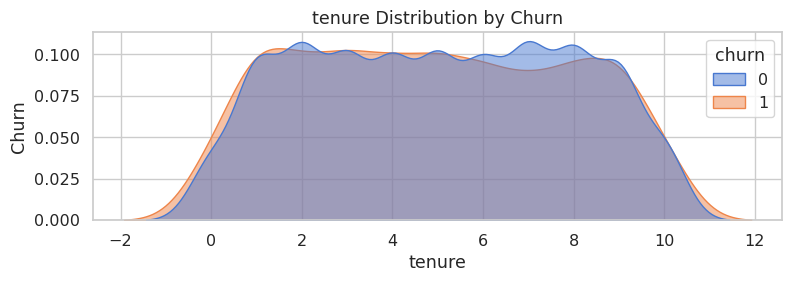

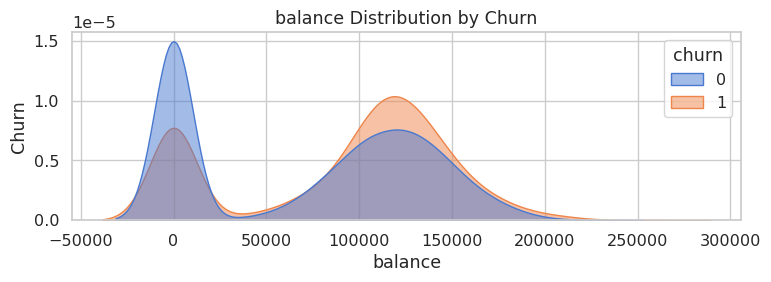

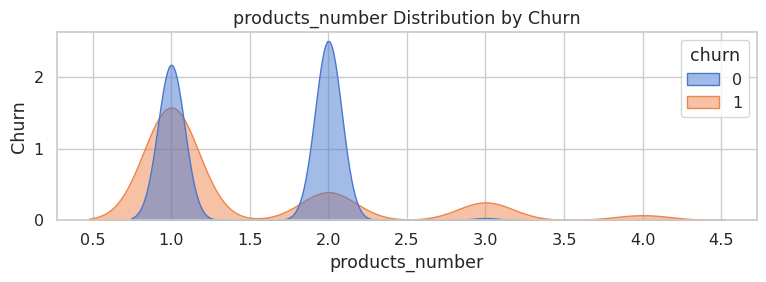

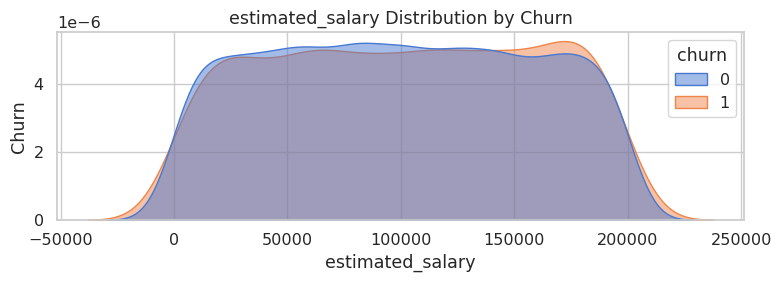

In [15]:
num_cols =["credit_score","age","tenure","balance","products_number","estimated_salary"] 

# ---- Distrution plots 
for col in num_cols:
    plt.figure(figsize=(8,3)) 
    sns.kdeplot(data=df,x=col,hue='churn',fill=True,common_norm=False,alpha=0.5) 
    plt.title(f"{col} Distribution by Churn") 
    plt.xlabel(f"{col}") 
    plt.ylabel('Churn') 
    plt.tight_layout() 
    plt.show()

In [16]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

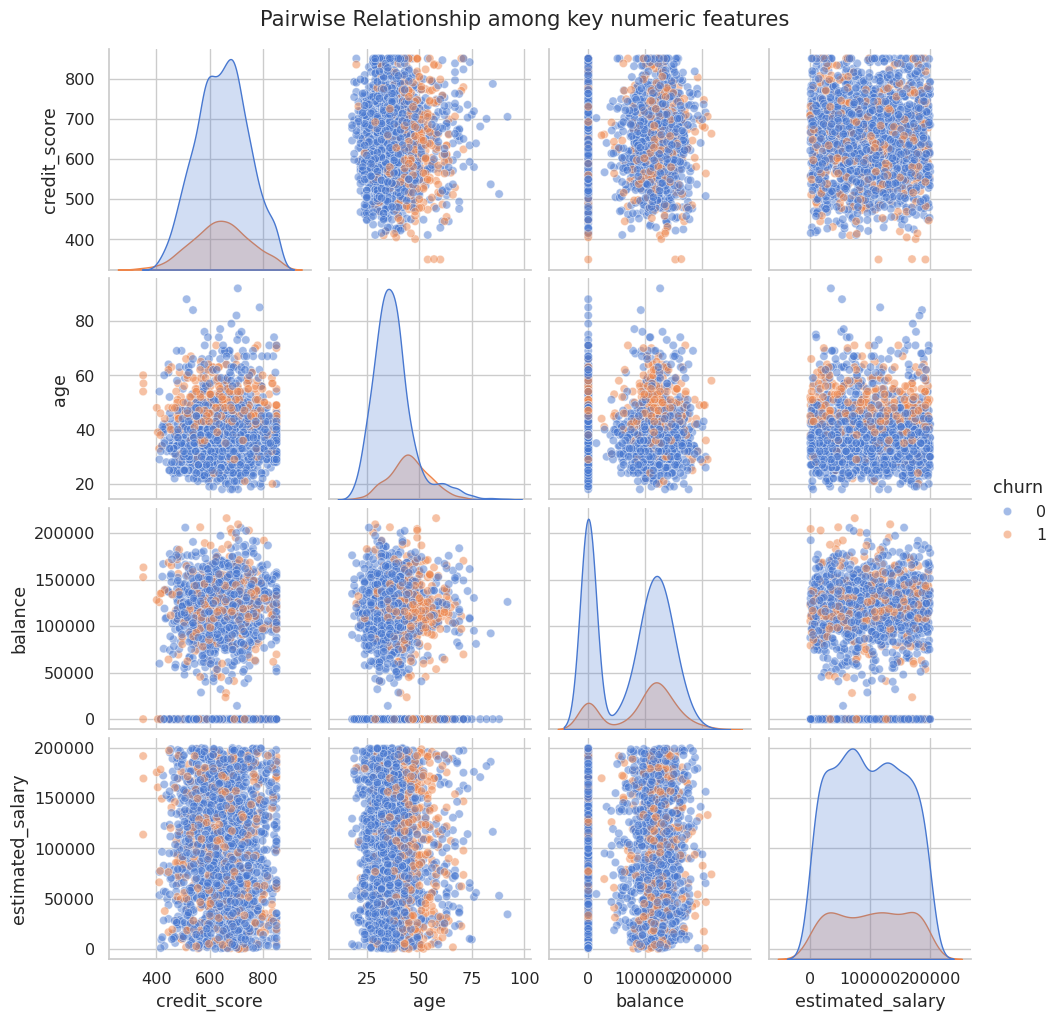

In [17]:
# ---- Pairplot (Sampled for Speed) 
sns.pairplot(df.sample(frac=0.2,random_state=42,),
            vars=["credit_score","age","balance","estimated_salary"],
             hue="churn",diag_kind='kde',plot_kws={'alpha':0.5}) 

plt.suptitle("Pairwise Relationship among key numeric features",y=1.02) 
plt.show()

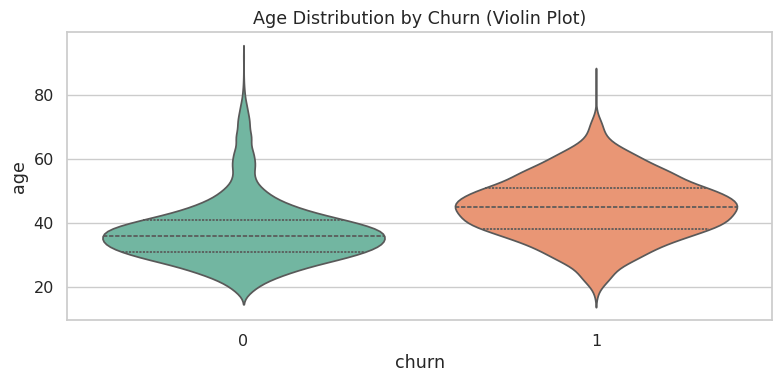

In [18]:
# --- violin plot for age  
plt.figure(figsize=(8,4)) 
sns.violinplot(data=df,x='churn',y='age',inner ='quart',palette="Set2") 
plt.title("Age Distribution by Churn (Violin Plot)")
plt.tight_layout()
plt.show()

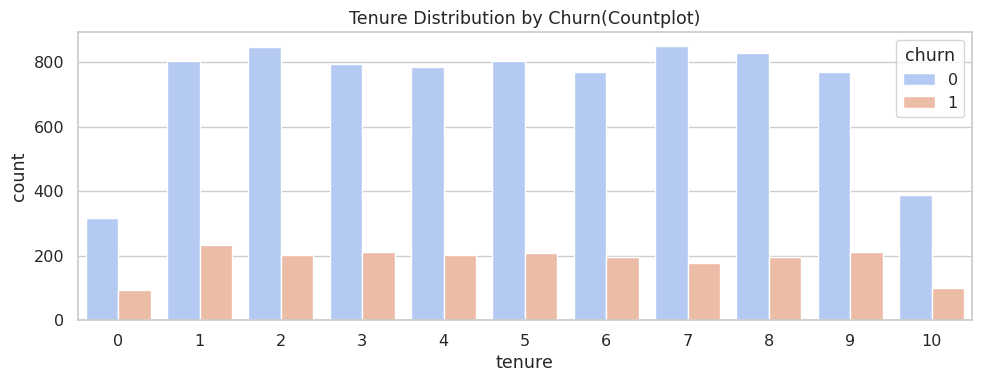

In [20]:
# --- Tenure Distrubution  
plt.figure(figsize=(10,4)) 
sns.countplot(data=df,x='tenure',hue="churn",palette='coolwarm') 
plt.title("Tenure Distribution by Churn(Countplot)") 
plt.tight_layout()
plt.show()

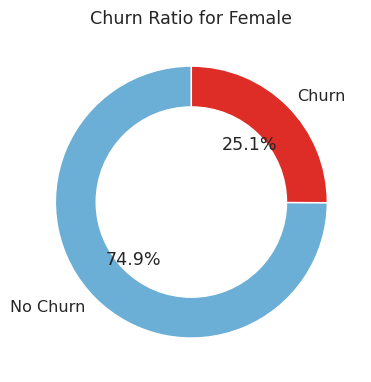

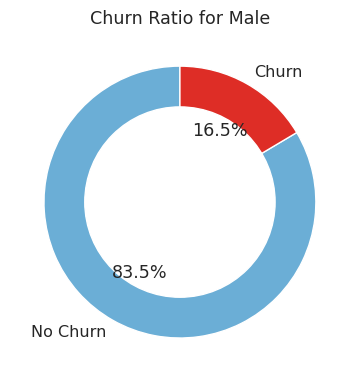

In [23]:

# ---- Gender vs Churn Donut Chart  
gender_count = df.groupby("gender")["churn"].value_counts(normalize=True).unstack()

for gender in gender_count.index:
    plt.figure(figsize=(8, 4))

    plt.pie(
        gender_count.loc[gender],
        labels=["No Churn", "Churn"],
        autopct="%1.1f%%",
        startangle=90,
        colors=["#6baed6", "#de2d26"]
    )

    # Donut center
    center = plt.Circle((0, 0), 0.70, fc="white")
    fig = plt.gcf()
    fig.gca().add_artist(center)

    plt.title(f"Churn Ratio for {gender}")
    plt.tight_layout()
    plt.show()


In [24]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

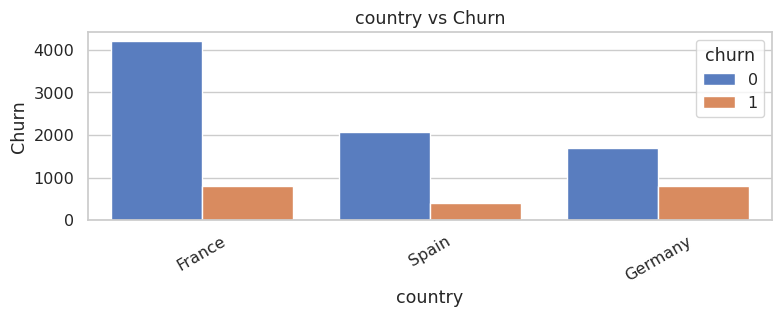

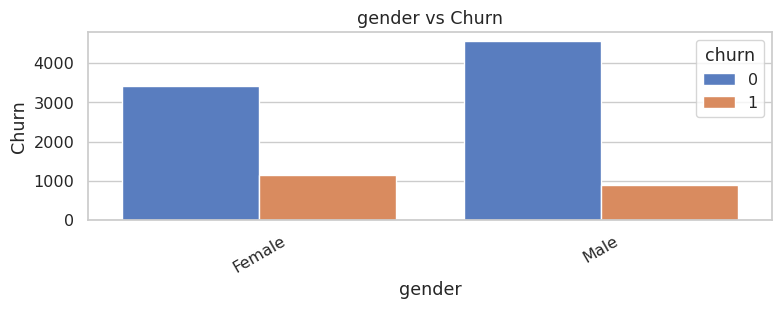

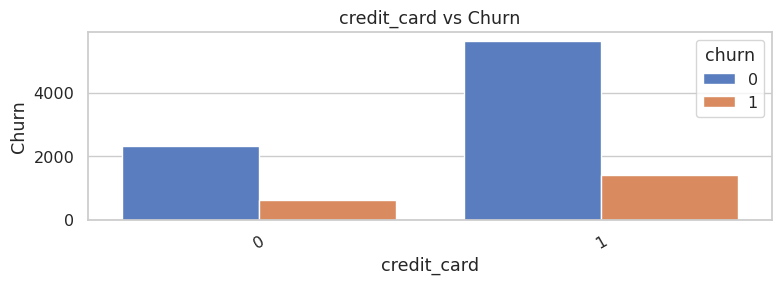

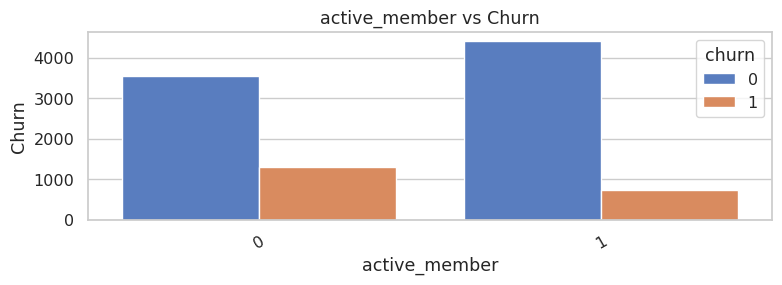

In [26]:
## categorical feature  
cat_cols =['country','gender','credit_card','active_member'] 
for c in cat_cols : 
    plt.figure(figsize=(8,3)) 
    sns.countplot(data=df,x=c,hue="churn") 
    plt.title(f'{c} vs Churn') 
    plt.xlabel(f'{c}') 
    plt.ylabel("Churn") 
    plt.tight_layout() 
    plt.xticks(rotation=30)
    plt.show() 

In [30]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

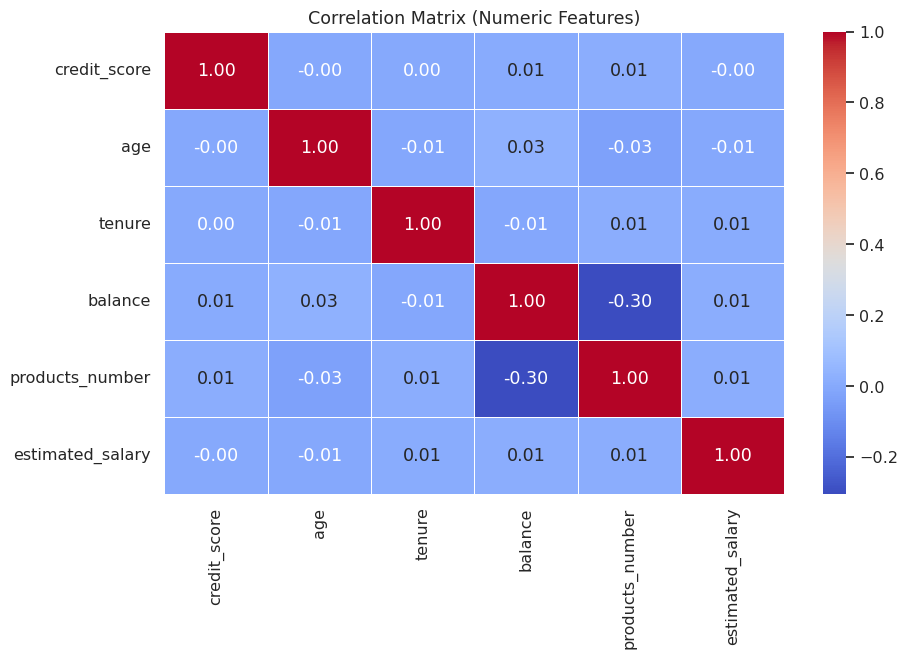

In [32]:
corr_cols = ['credit_score','age','tenure','balance','products_number','estimated_salary']

corr = df[corr_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix (Numeric Features)")
plt.show()


In [33]:
# numerical Corelation heatmap 
numeric_data =df[num_cols] 
corr =numeric_data.corr() 
corr.style.background_gradient(cmap="coolwarm")

,credit_score,age,tenure,balance,products_number,estimated_salary
credit_score,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384
age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201
tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784
balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797
products_number,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204
estimated_salary,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000


Text(0.5, 1.0, 'Balance vs Number of Products by Churn ')

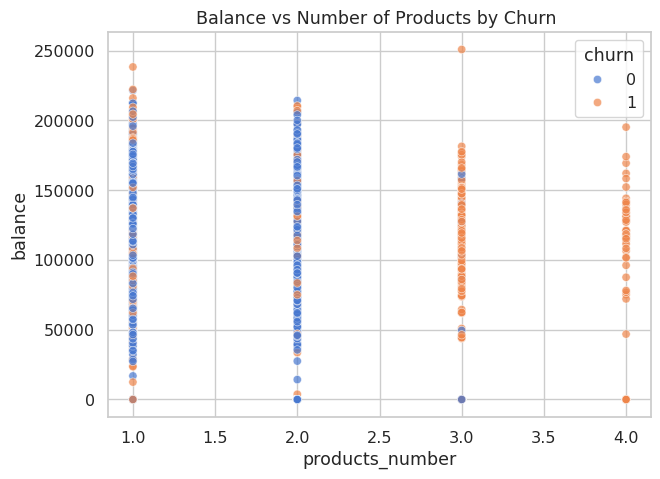

In [34]:
# ---balance vs products Scatter 
plt.figure(figsize=(7,5)) 
sns.scatterplot(data=df,x='products_number',y='balance',hue='churn',alpha=0.7) 
plt.title("Balance vs Number of Products by Churn ") 


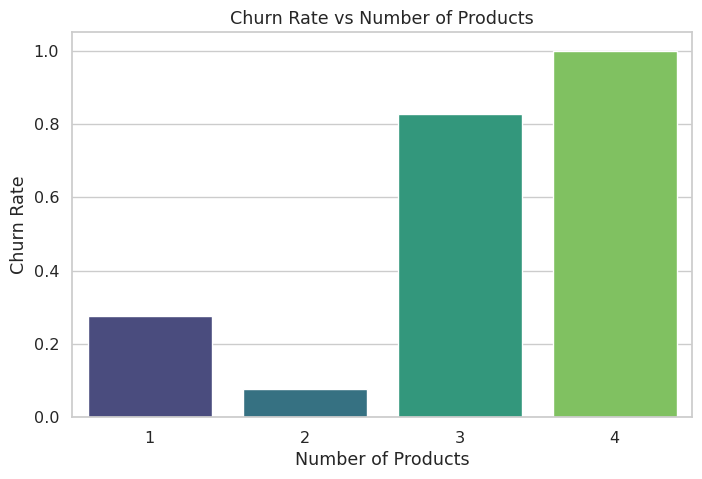

In [37]:
# aggregate the rate per number of Products 
churn_rate =df.groupby('products_number')['churn'].mean().reset_index() 

#plot Churn rate 
plt.figure(figsize=(8,5)) 
sns.barplot(data=churn_rate,x='products_number',y='churn',palette='viridis') 
plt.xlabel("Number of Products") 
plt.ylabel("Churn Rate") 
plt.title("Churn Rate vs Number of Products") 
plt.show()

## Feature Engneering 

In [46]:
df_fe =df.copy()

In [47]:
df_fe.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [48]:
df_fe['balance_per_product'] =df_fe['balance']/(df_fe['products_number'].replace(0,np.nan)) 
df_fe['balance_per_product'].fillna(0,inplace=True) 

# claculate the salary to balance ratio 
df_fe['salary_balance_ratio'] =df_fe['estimated_salary']/(df_fe['balance'].replace(0,np.nan))
df_fe['salary_balance_ratio'].replace([np.inf,-np.inf],np.nan,inplace=True) 
df_fe['salary_balance_ratio'].fillna(df_fe['salary_balance_ratio'].median(),inplace=True) 

# Age Group 
bins =[0,25,35,45,55,65,100] 
labels =['<25','25-34','35-44','45-54','55-64','65+'] 
df_fe['age_group'] =pd.cut(df_fe['tenure'],bins=bins,labels=labels) 

#tenure bucket =
df_fe['tenure_bucket'] =pd.cut(df_fe['tenure'],bins=[-1,0,2,5,10,100],labels=['0','1-2','3-5','6-10','10+']) 

#Flag high balance 
df_fe['high_balance'] =(df_fe['balance']>df_fe['balance'].quantile(0.75).astype(int)) 

#Quick Check 
df_fe[['balance_per_product','salary_balance_ratio','age','age_group','tenure','tenure_bucket','high_balance']].head()

,balance_per_product,salary_balance_ratio,age,age_group,tenure,tenure_bucket,high_balance
0,0.000000,0.839258,42,<25,2,1-2,False
1,83807.860000,1.342864,41,<25,1,1-2,False
2,53220.266667,0.713585,42,<25,8,6-10,True
3,0.000000,0.839258,39,<25,1,1-2,False
4,125510.820000,0.630098,43,<25,2,1-2,False


In [42]:
df_fe.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,balance_per_product
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,83807.860000
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,53220.266667
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,125510.820000


## Preprocessing -edcoding & scaling 

In [49]:
df_fe.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn', 'balance_per_product',
       'salary_balance_ratio', 'age_group', 'tenure_bucket', 'high_balance'],
      dtype='object')

In [64]:
# define feature and target 
target = 'churn' 
drop_col =['customer_id'] 
features = [c for c in df_fe.columns if  c not in [target] + drop_col] 
numeric_feature = ['credit_score', 'age', 'tenure',
       'balance', 'products_number','estimated_salary', 'balance_per_product',
       'salary_balance_ratio'] 
categorical_features =[ 'country', 'gender', 'credit_card', 'active_member', 'age_group', 'tenure_bucket', 'high_balance'] 
df_fe[categorical_features] =df_fe[categorical_features].astype('object') 

numeric_tranformer =Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler()) 
]) 
categorical_tranformer =Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')), 
    ('onehot',OneHotEncoder(handle_unknown='ignore',sparse_output=False)) 
]) 
preprocessor = ColumnTransformer([
    ('num',numeric_tranformer,numeric_feature), 
    ('cat',categorical_tranformer,categorical_features) 
]) 
print('Numberic Feature : ',numeric_feature) 
print('categorical Features: ',categorical_features)

Numberic Feature :  ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary', 'balance_per_product', 'salary_balance_ratio']
categorical Features:  ['country', 'gender', 'credit_card', 'active_member', 'age_group', 'tenure_bucket', 'high_balance']


In [65]:
x =df_fe[features] 
y =df_fe[target] 

x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,stratify=y,random_state=42) 
print('train shape',x_train.shape,'Test shape',x_test.shape) 
print('train churn proportion ',y_train.mean(),'Test churn proportion',y_test.mean()) 


train shape (8000, 15) Test shape (2000, 15)
train churn proportion  0.20375 Test churn proportion 0.2035


### Train Multiple Model with Pipline 

In [66]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=500),
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=200, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=200, random_state=42),
    'SVC': SVC(probability=True, random_state=42)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

result = {}

for name, model in models.items():
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    scores = cross_val_score(
        pipe,
        x_train,
        y_train,
        cv=cv,
        scoring='roc_auc',
        n_jobs=-1
    )
    
    result[name] = scores
    print(f"{name} AUC: mean={scores.mean():.4f} std={scores.std():.4f}")


LogisticRegression AUC: mean=0.7623 std=0.0204
RandomForest AUC: mean=0.8500 std=0.0138
GradientBoosting AUC: mean=0.8617 std=0.0101
AdaBoost AUC: mean=0.8460 std=0.0134
SVC AUC: mean=0.8391 std=0.0123


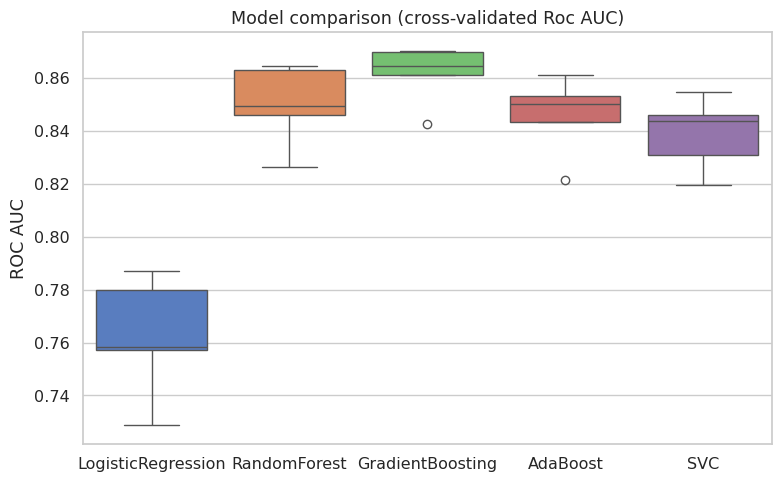

In [68]:
# Boxplot of CV AUC scores 
plt.figure(figsize=(8,5)) 
sns.boxplot(data=[result[m] for m in list(result.keys())]) 
plt.xticks(ticks=range(len(result)),labels=list(result.keys())) 
plt.ylabel('ROC AUC') 
plt.title("Model comparison (cross-validated Roc AUC)")   
plt.tight_layout()
plt.show() 

In [69]:
# Choose best model (automatic pick by mean Auc) 
best_name  =max(result.keys(),key=lambda k: result[k].mean()) 
best_name, result[best_name].mean()

('GradientBoosting', np.float64(0.8617407132744557))